In [1]:
from bprg.config import default_graph
from bprg.plotting import PercolationViz
from bprg.simulation import BPRG

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)

In [2]:
# load default graph setting
locals().update(default_graph)
default_graph

{'ns': 1000,
 'dx': 0.001,
 'S': [0, 1],
 'K': 2,
 'η': array([0.1, 0. , 0.9]),
 'μ': <function bprg.config.<lambda>(x)>,
 'κ': <function bprg.config.<lambda>(x, y)>}

# Kernel plot

In [16]:
slin = np.linspace(S[0], S[1], 200)
X, Y = np.meshgrid(slin, slin)
Z = κ(X, Y)

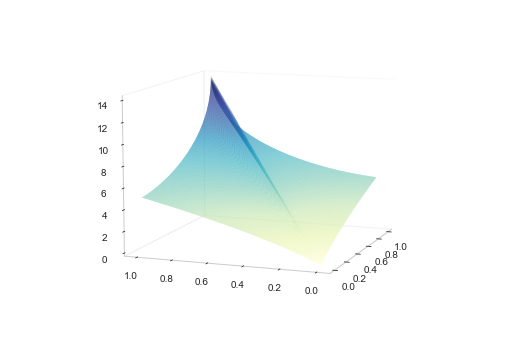

In [4]:
plt.style.use('seaborn-whitegrid')
# plt.style.use('default')
fig, ax = plt.subplots(figsize=(9,6))
ax.axis('off')
ax = plt.axes(projection='3d')
ax.view_init(10,-160)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='YlGnBu', edgecolor='none', alpha=0.9)

# ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.set_facecolor('white') 
ax.grid(False) 
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False

In [5]:
fig.savefig('../fig/kernel.pdf', format='pdf', transparent=True)

# Percolation plot

In [6]:
L = 100
nv = 100
bprg = BPRG(nv, S, L, K, κ, η)
# seed = 4569
np.random.seed(2021)
sim = bprg.simulate()

A = sim['A']
kv_list = sim['kv_list']
len(kv_list)

9

In [7]:
pv = PercolationViz(A, kv_list, prog='twopi', root=1)
EDGE_OPTIONS = {
    'width': 0.05,
    'alpha': 0.1,
}
NODE_OPTIONS = {
    'node_size': 17,
    'alpha':0.8,    
}

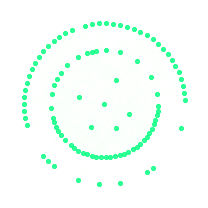

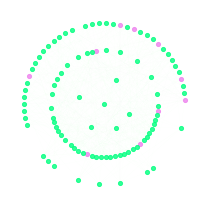

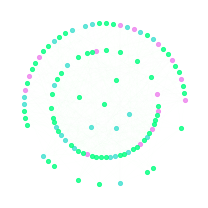

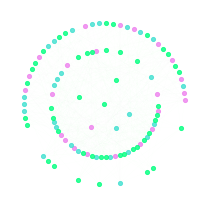

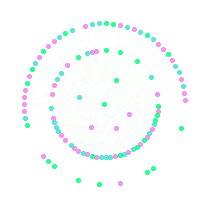

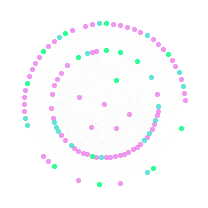

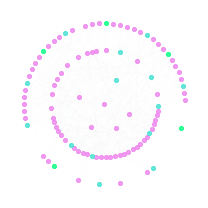

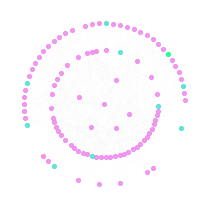

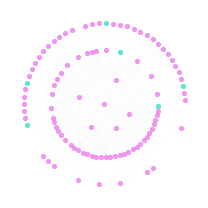

In [8]:
pplots = pv.get_percolation_plots(figsize=(3,3),
                                  node_options=NODE_OPTIONS,
                                  edge_options=EDGE_OPTIONS)
for i, p in enumerate(pplots):
    p.savefig('../fig/perc_%s.pdf'%i, format='pdf', transparent=True)

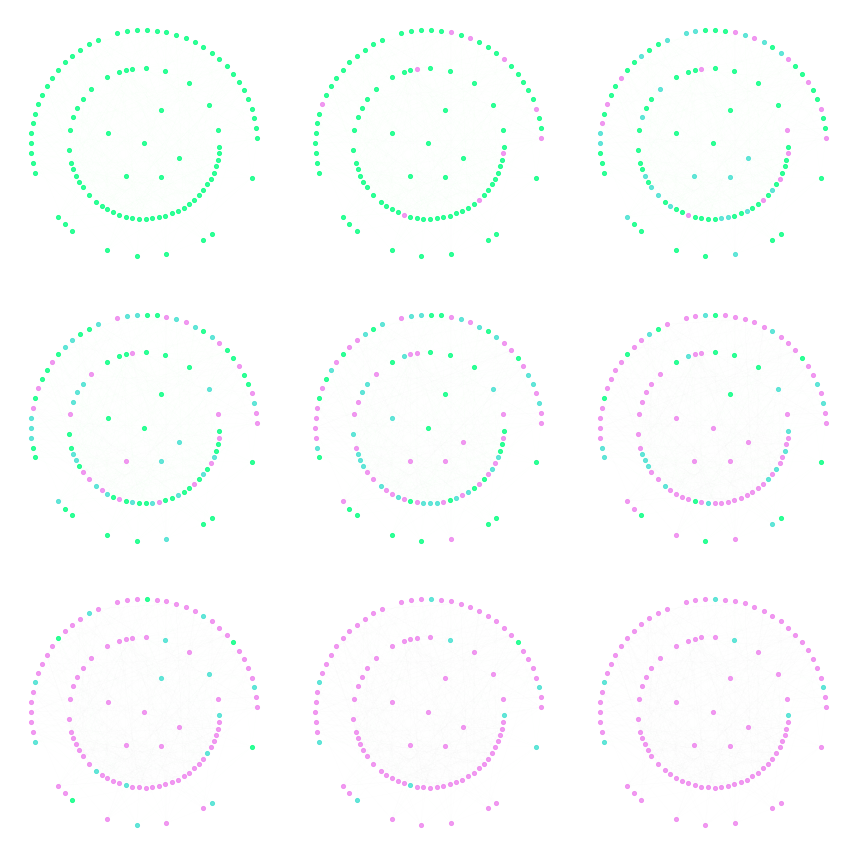

In [10]:
fig = pv.get_percolation_plot(3,3,range(9), figsize=(12,12),
                              node_options=NODE_OPTIONS,
                              edge_options=EDGE_OPTIONS)
fig.savefig('../fig/perc_combo.pdf', format='pdf', transparent=True)

# Function plot

In [11]:
figsize = (6,4)
plt.rcParams['text.usetex'] = True
f_df = pd.read_csv('../data/function_value.csv', index_col=0)

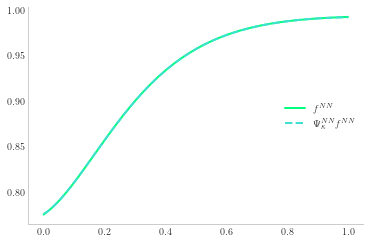

In [12]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(f_df['s'], f_df['f'],
        color='springgreen', linestyle='-',
        linewidth=2,
        label=r'$f^{NN}$')
ax.plot(f_df['s'], f_df['Ψf'],
        linewidth=2,
        color='turquoise', linestyle='dashed',
        label=r'$\Psi_{\kappa}^{NN} f^{NN}$')
# ax.spines['bottom'].set_color('grey')
# ax.spines['left'].set_color('grey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='right', frameon=False)
ax.grid(False)

fig.savefig('../fig/func_fig1.pdf', format='pdf', transparent=True)

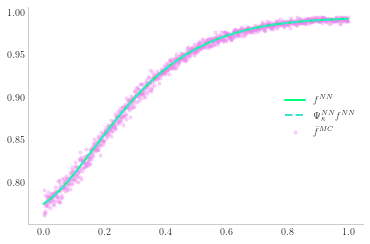

In [13]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(f_df['s'], f_df['f'],
        color='springgreen', linestyle='-',
        linewidth=2,
        label=r'$f^{NN}$')
ax.plot(f_df['s'], f_df['Ψf'],
        linewidth=2,
        color='turquoise', linestyle='dashed',
        label=r'$\Psi_{\kappa}^{NN} f^{NN}$')
ax.scatter(f_df['s'], f_df['f_L'],
           color='violet', alpha=0.3, s=9,
          label=r'$\bar{f}^{MC}$')

# ax.spines['bottom'].set_color('grey')
# ax.spines['left'].set_color('grey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='right', frameon=False)
ax.grid(False)
fig.savefig('../fig/func_fig2.pdf', format='pdf', transparent=True)

In [15]:
f_df.mean()

s      0.500000
f      0.927384
Ψf     0.927350
f_L    0.927060
dtype: float64

# Simulation plot

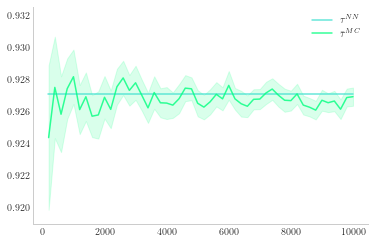

In [28]:
pct_df = pd.read_csv('../data/infection_pct.csv', index_col=0)
pct_df_melt = pct_df.reset_index().melt(id_vars='n')

tau = f_df['f_L'].mean()
x = pct_df.index.values
y = pct_df.mean(axis=1)
ci = 1.96 * pct_df.std(axis=1)/np.sqrt(pct_df.shape[1])
ci_low = y - ci
ci_high = y + ci

fig, ax = plt.subplots(figsize=figsize)
ax.axhline(tau,label=r'$\tau^{NN}$',
           xmin=0.045, xmax=0.955,
            color='turquoise', alpha=0.8)
ax.plot(x,y, color='springgreen', alpha=0.8, label=r'$\bar{\tau}^{MC}$')
ax.fill_between(x, ci_low, ci_high, color='springgreen', alpha=0.15)

# ax.spines['bottom'].set_color('grey')
# ax.spines['left'].set_color('grey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ylim = [ci_low.min()*0.999, ci_high.max()*1.002]
ax.set_ylim(*ylim)
ax.legend(frameon=False)
ax.grid(False)
fig.savefig('../fig/ci.pdf', format='pdf', transparent=True)